In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import random as rd


In [2]:
input_tensor = tf.keras.Input(shape=(224, 224, 3))

layer = tf.keras.layers.Conv2D(120, (3, 3), activation="relu")(input_tensor)
layer = tf.keras.layers.MaxPooling2D((2, 2))(layer)
layer = tf.keras.layers.Conv2D(64, (3, 3), activation="relu")(layer)
layer = tf.keras.layers.MaxPooling2D((2, 2))(layer)
layer = tf.keras.layers.Conv2D(32, (3, 3), activation="relu")(layer)
layer = tf.keras.layers.MaxPooling2D((2, 2))(layer)

layer = tf.keras.layers.Flatten()(layer)
layer = tf.keras.layers.Dense(32, activation="relu")(layer)
last_layer = tf.keras.layers.Dense(1, activation="sigmoid")(layer)

model = tf.keras.Model(input_tensor, layer)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [6]:
def _load_data(data_base_dir, images_discription_dir, image_shape):

    result_data_tensor = []
    labels = []
    image_discriptions = pd.read_csv(images_discription_dir)
    for discription_number in range(image_discriptions.shape[0]):
    
        image_name = image_discriptions.iloc[discription_number, 0]
        image_label = image_discriptions.iloc[discription_number, 1]

        try:

            if image_name[image_name.index("."): ] in [".png", ".jpg", ".jpeg"]:

                image_base_path = os.path.join(data_base_dir, image_name)

                image = cv2.imread(image_base_path)
                image = cv2.resize(image, (image_shape[0], image_shape[1]))

                result_data_tensor.append(image)
                labels.append(image_label)
        
        except BaseException:

            pass
    

    result_data_tensor = np.asarray(result_data_tensor)
    labels_tensor = np.asarray(labels)
    return (result_data_tensor, labels_tensor)

data_tensor, data_labels = _load_data(data_base_dir="C:\\Users\\1\\Desktop\\help_with_ML\\images", 
                                      images_discription_dir="C:\\Users\\1\\Desktop\\help_with_ML\\train.csv", 
                                      image_shape=(224, 224))

print(data_tensor, data_labels)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\1\\Desktop\\help_with_ML\\train.csv'

In [ ]:
train_data = data_tensor[:data_tensor.shape[0] // 2]
validation_data = data_tensor[data_tensor.shape[0] // 2: ]

train_label = data_labels[:data_labels.shape[0] // 2]
validation_label = data_labels[data_labels.shape[0] // 2: ]



history = model.fit(train_data, train_label,
          batch_size=1,
          epochs=30)

[0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0] [0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0

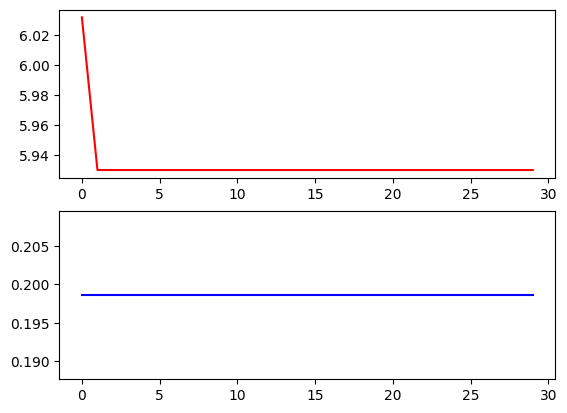

In [ ]:
fig, axis = plt.subplots(nrows=2)

axis[0].plot(history.history["loss"], color="red")
axis[1].plot(history.history["accuracy"], color="blue")

plt.show()